In [11]:
import tensorflow as tf
import sys
import numpy as np
from packaging import version

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [4]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

In [7]:
#let's build a deep denoising autoencoder 

tf.random.set_seed(42)

denoising_encoder = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(0.1),
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
])

In [8]:
denoising_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(16 * 16 * 32, activation="relu"),
    tf.keras.layers.Reshape([16, 16, 32]),
    tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2,
                                 padding="same", activation="sigmoid")
])

In [9]:
denoising_ae = tf.keras.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer="nadam",
                     metrics=["mse"])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_test, X_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 98ms/step - loss: 0.6044 - mse: 0.0234 - val_loss: 0.5856 - val_mse: 0.0140
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - loss: 0.5706 - mse: 0.0091 - val_loss: 0.5888 - val_mse: 0.0145
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 95ms/step - loss: 0.5665 - mse: 0.0075 - val_loss: 0.5741 - val_mse: 0.0094
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 96ms/step - loss: 0.5651 - mse: 0.0070 - val_loss: 0.5716 - val_mse: 0.0087
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - loss: 0.5643 - mse: 0.0067 - val_loss: 0.5678 - val_mse: 0.0076
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 96ms/step - loss: 0.5638 - mse: 0.0065 - val_loss: 0.5661 - val_mse: 0.0069
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - loss: 0.5634 - mse: 0.0064 - val_loss: 0.5693 - val_mse: 0.0083
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 97ms/step - loss: 0.5632 - mse: 0.0064 - val_loss: 0.5664 - val_mse: 0.0072
Epoch 9/10
1563/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


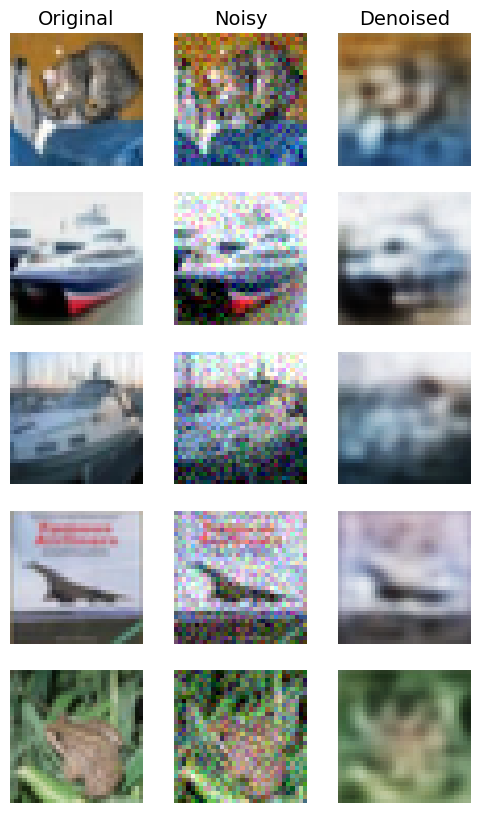

In [12]:
n_images = 5
new_images = X_test[:n_images]
new_images_noisy = new_images + np.random.randn(n_images, 32, 32, 3) * 0.1
new_images_denoised = denoising_ae.predict(new_images_noisy)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(new_images[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(new_images_noisy[index].clip(0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")

plt.show()